In [1]:
#Autoencoder Model

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import layers, models

# Load your data
df = pd.read_csv('/content/calls_total_df.csv')

# Preprocessing
numerical_features = ['Value']
categorical_features = ['http_method', 'http_route', 'http_status_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = df[numerical_features + categorical_features]
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test = train_test_split(X_preprocessed, test_size=0.2, random_state=42)

# Convert sparse to dense arrays if needed
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Autoencoder model
input_dim = X_train_dense.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(X_train_dense, X_train_dense,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_dense, X_test_dense))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.1589 - val_loss: 0.0011
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 9.8347e-04 - val_loss: 0.0010
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 9.9426e-04 - val_loss: 0.0010
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 9.3247e-04 - val_loss: 0.0010
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 9.9205e-04 - val_loss: 8.1996e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 7.9617e-04 - val_loss: 7.7146e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 7.2523e-04 - val_loss: 7.2408e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.4482e-04 - val_loss: 6.7850e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.0161e-04 - val_loss: 6.3196e-04
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 7.0209e-04 - val_loss: 6.2195e-04
Epo

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Reconstruction Error: 0.0006019214691931951
Max Reconstruction Error: 0.42461292241122645
Min Reconstruction Error: 3.2692399460455727e-07


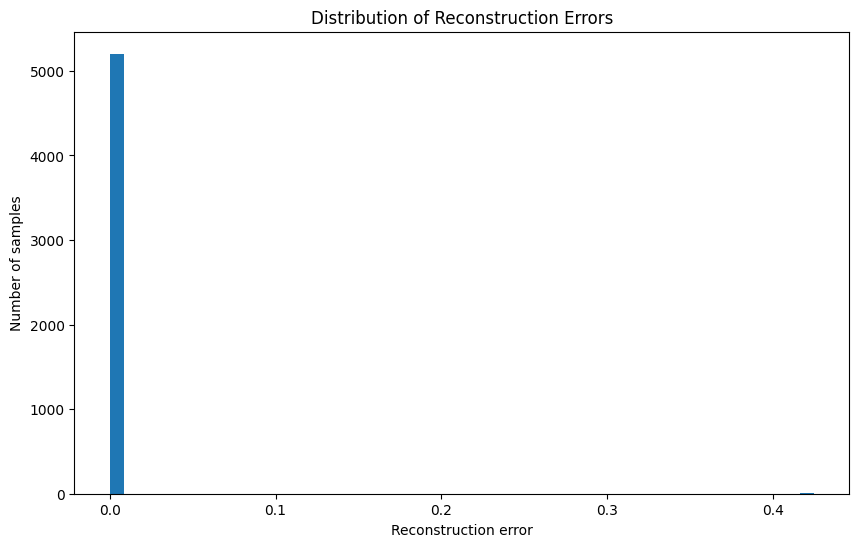

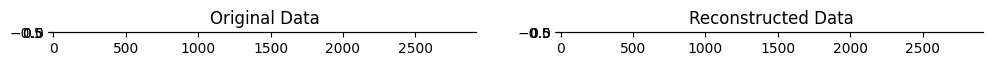

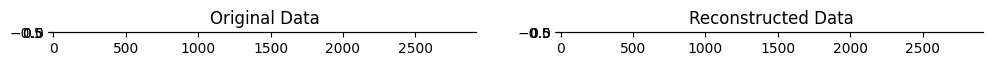

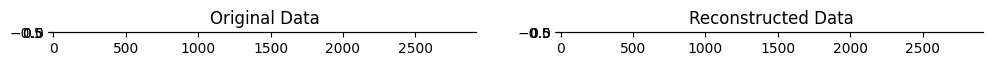

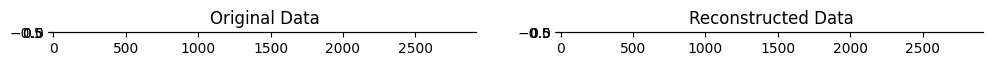

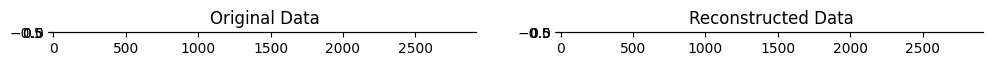

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the test data
reconstructed_data = autoencoder.predict(X_test)

# Calculate the reconstruction error
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Print some statistics of the reconstruction error
print("Mean Reconstruction Error:", np.mean(mse))
print("Max Reconstruction Error:", np.max(mse))
print("Min Reconstruction Error:", np.min(mse))

# You can also plot the distribution of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Distribution of Reconstruction Errors")
plt.show()

# If you want to see a comparison between the original and reconstructed data, select a few samples:
num_samples = 5
for i in range(num_samples):
    plt.figure(figsize=(12, 10))

    # Original data
    plt.subplot(1, 2, 1)
    # Convert the sparse matrix to a dense array and ensure the data type is float
    plt.imshow(X_test[i].toarray().astype(float).reshape(1, -1), cmap="gray")
    plt.title("Original Data")

    # Reconstructed data
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_data[i].reshape(1, -1), cmap="gray")
    plt.title("Reconstructed Data")

    plt.show()

In [5]:
# Set a threshold for anomaly detection
threshold = np.mean(mse) + 2 * np.std(mse)  # Example threshold: mean + 2 std deviations

# Identify anomalies
anomalies = mse > threshold

# Print out the number of anomalies
print("Number of anomalies detected:", np.sum(anomalies))


Number of anomalies detected: 4


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Shape of X_test: (5206, 2919)
Shape of reconstructed_data: (5206, 2919)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4 and the array at index 1 has size 1

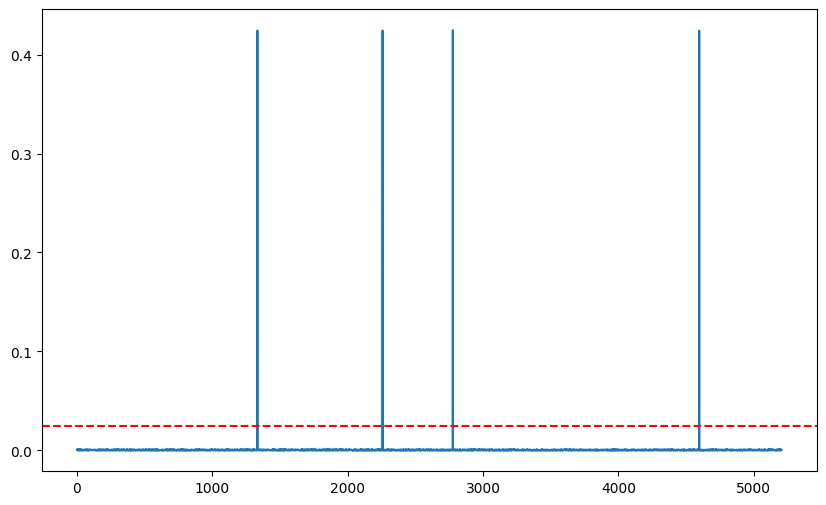

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the test data
reconstructed_data = autoencoder.predict(X_test)

# Check the shapes of the original and reconstructed data
print("Shape of X_test:", X_test.shape)
print("Shape of reconstructed_data:", reconstructed_data.shape)

# Ensure that both arrays have the same shape
if X_test.shape != reconstructed_data.shape:
    print("Shape mismatch! Adjust your model or data processing.")
else:
    # Calculate the reconstruction error (MSE) for each sample
    mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

    # Set a threshold for anomaly detection
    threshold = np.mean(mse) + 2 * np.std(mse)  # Example threshold

    # Identify anomalies
    anomalies = mse > threshold

    # Plot reconstruction errors with anomalies highlighted
    plt.figure(figsize=(10, 6))
    plt.plot(mse, label="Reconstruction Error")
    plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")

    # Convert mse and anomalies to 1D arrays for scatter plot
    mse = mse.ravel()  # Flatten mse to a 1D array
    anomalies = anomalies.ravel() # Flatten anomalies to a 1D array
    plt.scatter(np.where(anomalies)[0], mse[anomalies], color='r', label="Anomalies")

    plt.xlabel("Sample index")
    plt.ylabel("Reconstruction error")
    plt.title("Reconstruction Error with Anomalies Highlighted")
    plt.legend()
    plt.show()